In [14]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from utils import generate_matrix, batch_dirichlet, get_similarities, plot_similarities, get_differences, plot_differences, get_images, plot_images


In [15]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(10,5)})

In [70]:
n_steps = 64

n=64
v=10
d=8

w_shape = (d,d)
a_shape = (v,v)
f_shape = (n,v,d)

In [71]:
def generate_matrix(dim,sign=1):
    #V = np.diag(sign*np.random.rand(dim))
    #Q = np.random.normal(0,0.1,(dim,dim))
    #return Q@V@np.linalg.inv(Q)
    Wp = np.random.normal(0,0.1,(dim,dim))
    W0 = 0.5*(Wp+Wp.T)
    W = - W0@W0.T
    return W

def diffusion_step(F,A,W,tau=1):
    return tau*np.einsum('kv,nvd -> nkd',A,np.einsum('nvd,dk -> nvk',F,W)) + F

def diffusion_stepFT(F,A,W,tau=0.5):
    return tau*np.einsum('kv,nvd -> nkd',A,np.einsum('nvd,dk -> nvk',F,W)) + (1-tau)*F

def diffusion_stepI(F,A,W,tau=1):
    return tau*np.einsum('kv,nvd -> nkd',A-np.eye(A.shape[0]),np.einsum('nvd,dk -> nvk',F,W)) + F

def diffusion_stepIFT(F,A,W,tau=1):
    return tau*np.einsum('kv,nvd -> nkd',A-np.eye(A.shape[0]),np.einsum('nvd,dk -> nvk',F,W)) + (1-tau)*F

def diffuse(F0,As,Ws,step_fn,tau=1):
    assert len(As) == len(Ws), "As and Ws must be of same length"
    
    outputs = [F0]
    for A,W in zip(As,Ws):
        outputs.append(step_fn(outputs[-1],A,W,tau))
    
    return outputs

In [69]:
outputs[-1].shape

(64, 10, 8)

# $\mathbf{F}(t+1) = \tau \mathbf{A}(\mathbf{F}(t))\mathbf{F}(t)\mathbf{W}(t) + \mathbf{F}(t)$

In [65]:
As =[
    scipy.special.softmax(np.random.normal(0,1,a_shape), axis=0) for _ in range(n_steps)
]

Ws =[
    generate_matrix(d,-1) for _ in range(n_steps) #np.random.normal(0,1,w_shape)
]

F0 = np.random.normal(0,1,f_shape)

In [66]:
eigs = np.linalg.eigvals(Ws[0])
for e in eigs: print(e)

-0.08237449107257
-0.06481775332820912
-0.0014153771018352006
-2.881199361414873e-06
-0.031040591699317135
-0.02597302464489518
-0.016691495173767966
-0.018012972397449808


In [67]:
outputs = diffuse(F0,As,Ws,diffusion_step,tau=1)

## Oversmoothing

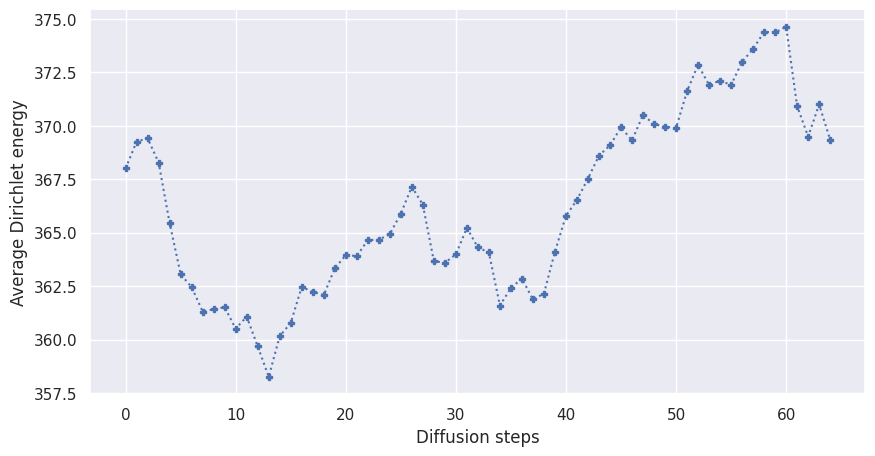

In [21]:
similarities = get_similarities(outputs)
plot_similarities(similarities)

## Stability

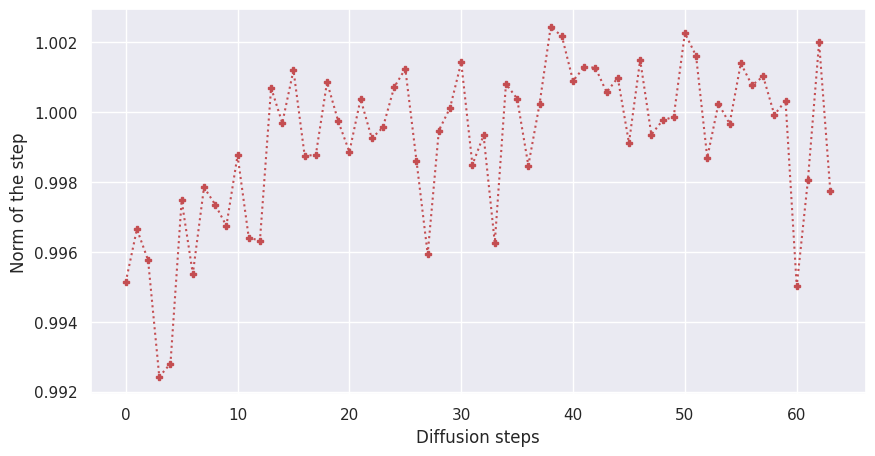

In [22]:
differences = get_differences(outputs)
plot_differences(differences)

# $\mathbf{F}(t+1) = \tau \mathbf{A}(\mathbf{F}(t))\mathbf{F}(t)\mathbf{W}(t) + (1 - \tau) \mathbf{F}(t)$

In [72]:
As =[
    scipy.special.softmax(np.random.normal(0,1,a_shape), axis=0) for _ in range(n_steps)
    #(np.ones(a_shape) - np.eye(a_shape[0]))/a_shape[0] for _ in range(n_steps)
]

Ws =[
    #scipy.special.softmax(np.random.normal(0,0.1,w_shape), axis=1)/w_shape[1] for _ in range(n_steps)
    #scipy.special.softmax(generate_matrix(d,-1), axis=1)/w_shape[1] for _ in range(n_steps)
    generate_matrix(d,-1) for _ in range(n_steps)
]
#for W in Ws: W = 0.5*(W+W.T)

F0 = np.random.normal(0,1,f_shape)

In [73]:
eigs = np.linalg.eigvals(Ws[0])
for e in eigs: print(e)

-0.12275134054274761
-0.0949257515957374
-0.06315219396801022
-0.047095392476479266
-0.0004403233413868758
-0.011729347882439543
-0.016806407411196777
-0.01603573916668063


In [74]:
outputs = diffuse(F0,As,Ws,diffusion_stepFT,tau=0.5)

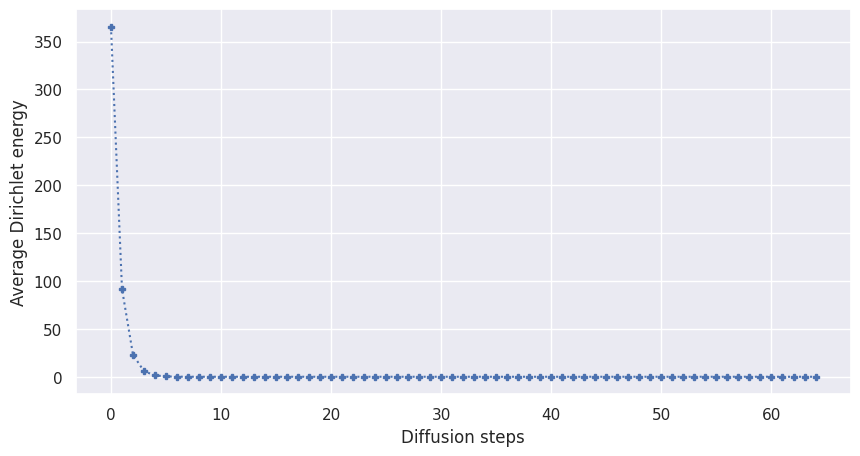

In [75]:
similarities = get_similarities(outputs)
plot_similarities(similarities)

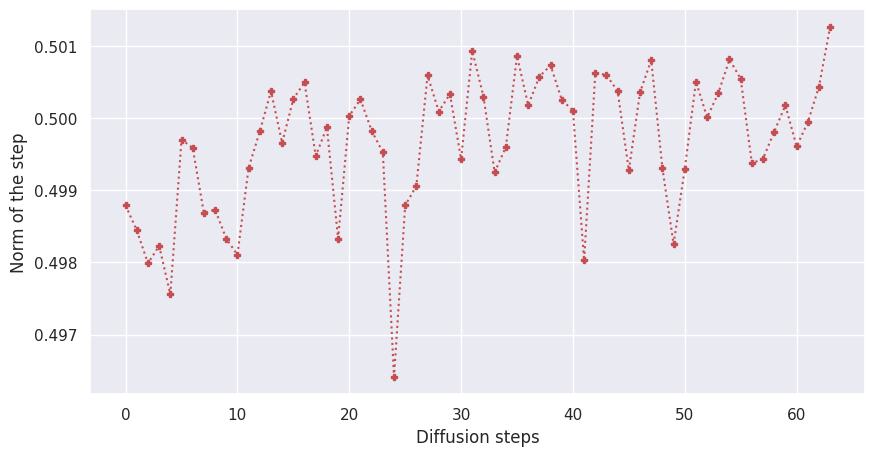

In [76]:
differences = get_differences(outputs)
plot_differences(differences)

# $\mathbf{F}(t+1) = \tau \bar{\mathbf{A}}(\mathbf{F}(t))\mathbf{F}(t)\mathbf{W}(t) + \mathbf{F}(t)$

In [77]:
outputs = diffuse(F0,As,Ws,diffusion_stepI,tau=1)

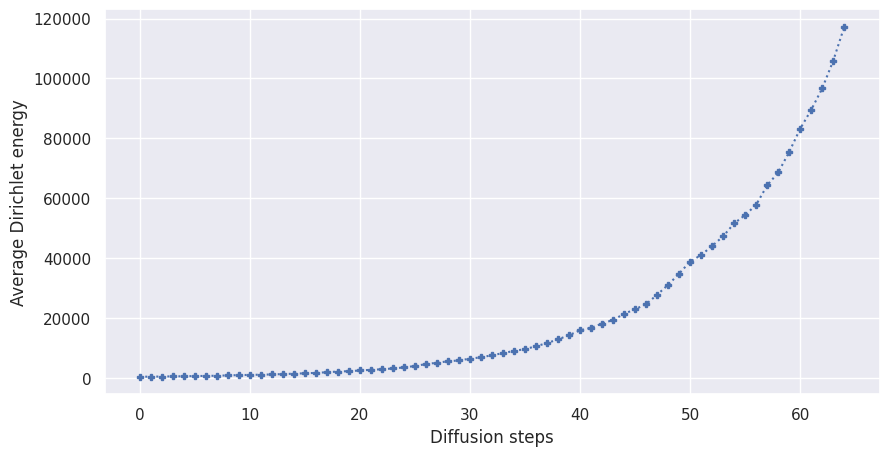

In [78]:
similarities = get_similarities(outputs)
plot_similarities(similarities)

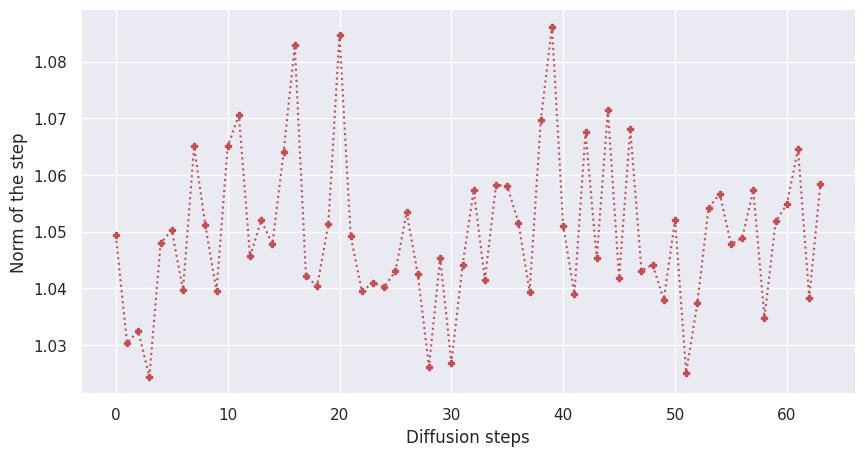

In [63]:
differences = get_differences(outputs)
plot_differences(differences)

In [58]:
outputs = diffuse(F0,As,Ws,diffusion_stepIFT,tau=0.5)

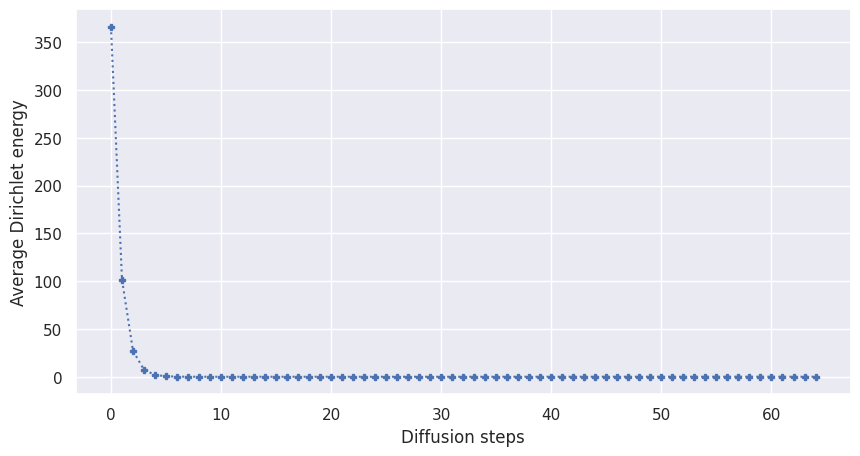

In [59]:
similarities = get_similarities(outputs)
plot_similarities(similarities)

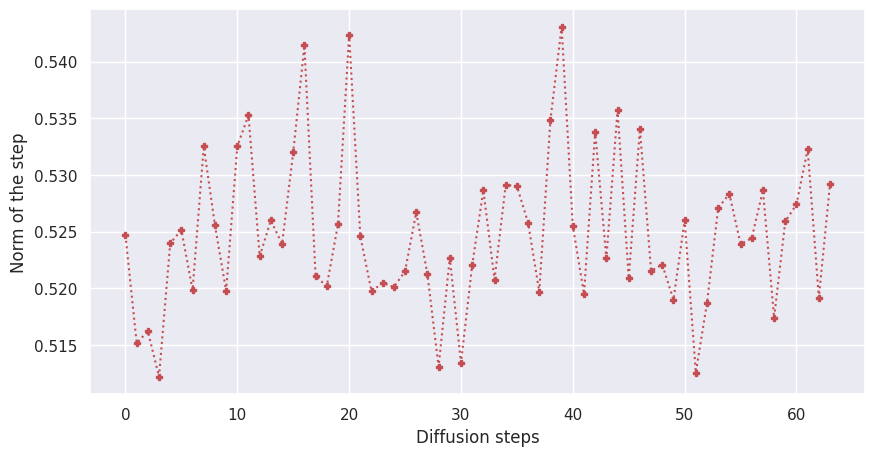

In [60]:
differences = get_differences(outputs)
plot_differences(differences)